In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)


In [1]:
from huggingface_hub import login
login()

In [3]:
dataset = load_dataset("Shelton1013/SwitchLingua_text")
print("Loading is complete!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

Arabic_eng.csv:   0%|          | 0.00/55.7M [00:00<?, ?B/s]

Can_Eng.csv:   0%|          | 0.00/694M [00:00<?, ?B/s]

Chinese_eng.csv:   0%|          | 0.00/56.7M [00:00<?, ?B/s]

French_eng.csv:   0%|          | 0.00/51.7M [00:00<?, ?B/s]

German_Eng.csv:   0%|          | 0.00/44.5M [00:00<?, ?B/s]

German_French.csv:   0%|          | 0.00/55.6M [00:00<?, ?B/s]

Hindi_eng.csv:   0%|          | 0.00/56.3M [00:00<?, ?B/s]

Italian_eng.csv:   0%|          | 0.00/51.9M [00:00<?, ?B/s]

Japanese_eng.csv:   0%|          | 0.00/56.7M [00:00<?, ?B/s]

Korean_eng.csv:   0%|          | 0.00/52.4M [00:00<?, ?B/s]

Malay_eng.csv:   0%|          | 0.00/53.4M [00:00<?, ?B/s]

Philippines_eng.csv:   0%|          | 0.00/51.9M [00:00<?, ?B/s]

Russian_eng.csv:   0%|          | 0.00/55.4M [00:00<?, ?B/s]

Spanish_eng.csv:   0%|          | 0.00/50.8M [00:00<?, ?B/s]

Vietnamese_eng.csv:   0%|          | 0.00/57.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/234172 [00:00<?, ? examples/s]

Loading is complete!


In [4]:
print("=== Dataset Structure ===")
print(dataset)

=== Dataset Structure ===
DatasetDict({
    train: Dataset({
        features: ['topic', 'tense', 'perspective', 'cs_ratio', 'gender', 'age', 'education_level', 'first_language', 'second_language', 'conversation_type', 'cs_function', 'cs_type', 'data_generation_result', 'fluency_result', 'naturalness_result', 'cs_ratio_result', 'social_cultural_result', 'summary', 'score'],
        num_rows: 234172
    })
})


In [5]:
print("=== Data field ===")
print(dataset['train'].features)

print("\n" + "="*50)
print("=== Sample data ===")
for i in range(3):
    print(f"\n--- sample {i+1} ---")
    print(dataset['train'][i])

=== Data field ===
{'topic': Value('string'), 'tense': Value('string'), 'perspective': Value('string'), 'cs_ratio': Value('string'), 'gender': Value('string'), 'age': Value('string'), 'education_level': Value('string'), 'first_language': Value('string'), 'second_language': Value('string'), 'conversation_type': Value('string'), 'cs_function': Value('string'), 'cs_type': Value('string'), 'data_generation_result': Value('string'), 'fluency_result': Value('string'), 'naturalness_result': Value('string'), 'cs_ratio_result': Value('string'), 'social_cultural_result': Value('string'), 'summary': Value('string'), 'score': Value('float64')}

=== Sample data ===

--- sample 1 ---
{'topic': 'general', 'tense': 'Present', 'perspective': 'First Person', 'cs_ratio': '30%', 'gender': 'Female', 'age': '66+', 'education_level': 'College', 'first_language': 'Arabic', 'second_language': 'English', 'conversation_type': 'multi-turn', 'cs_function': 'Expressive', 'cs_type': 'Extra-sentential / Tag switching

In [6]:
df = pd.DataFrame(dataset['train'])

print(f"Dataset size: {len(df)} records")
print(f"Number of fields: {len(df.columns)}")
print(f"\nField list:")
for col in df.columns:
    print(f"  - {col}")

Dataset size: 234172 records
Number of fields: 19

Field list:
  - topic
  - tense
  - perspective
  - cs_ratio
  - gender
  - age
  - education_level
  - first_language
  - second_language
  - conversation_type
  - cs_function
  - cs_type
  - data_generation_result
  - fluency_result
  - naturalness_result
  - cs_ratio_result
  - social_cultural_result
  - summary
  - score


Language Pair Distribution Analysis

Total number of language pairs: 15

Sample counts for each language pair:
language_pair
Cantonese - English      119248
Arabic - English           8548
Philippines - English      8537
German - French            8511
Chinese - English          8458
Vietnamese - English       8457
Malay - English            8386
Japanese - English         8385
Hindi - English            8381
Korean - English           8266
Spanish - English          8110
French - English           8070
Russian - English          8017
Italian - English          7979
German - English           6819
Name: count, dtype: int64


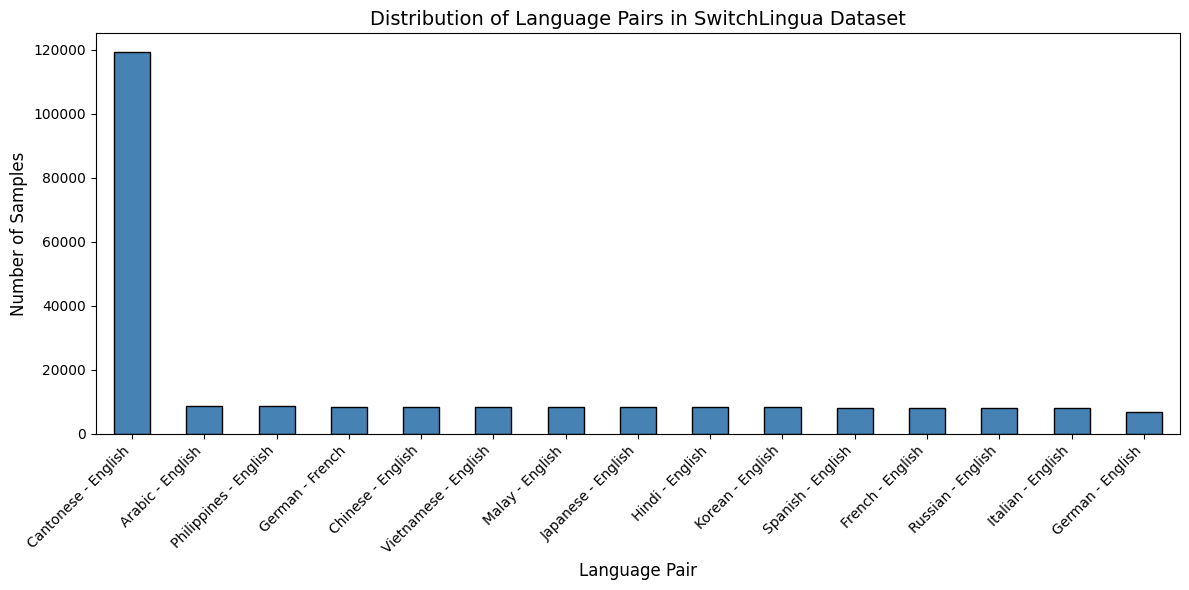


Chart saved as 'language_pair_distribution.png'


In [ ]:
# Language Pair Distribution Analysis
print("=" * 60)
print("Language Pair Distribution Analysis")
print("=" * 60)

# Create language pair column
df['language_pair'] = df['first_language'] + ' - ' + df['second_language']

# Count samples for each language pair
language_pair_counts = df['language_pair'].value_counts()

print(f"\nTotal number of language pairs: {len(language_pair_counts)}\n")
print("Sample counts for each language pair:")
print(language_pair_counts)

# Visualization
plt.figure(figsize=(12, 6))
language_pair_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribution of Language Pairs in SwitchLingua Dataset', fontsize=14)
plt.xlabel('Language Pair', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('language_pair_distribution.png', dpi=150)
plt.show()

print("\nChart saved as 'language_pair_distribution.png'")

Code-Switching Type Distribution
cs_type
Extra-sentential / Tag switching    78390
Intersentential                     78227
Intrasentential                     77555
Name: count, dtype: int64


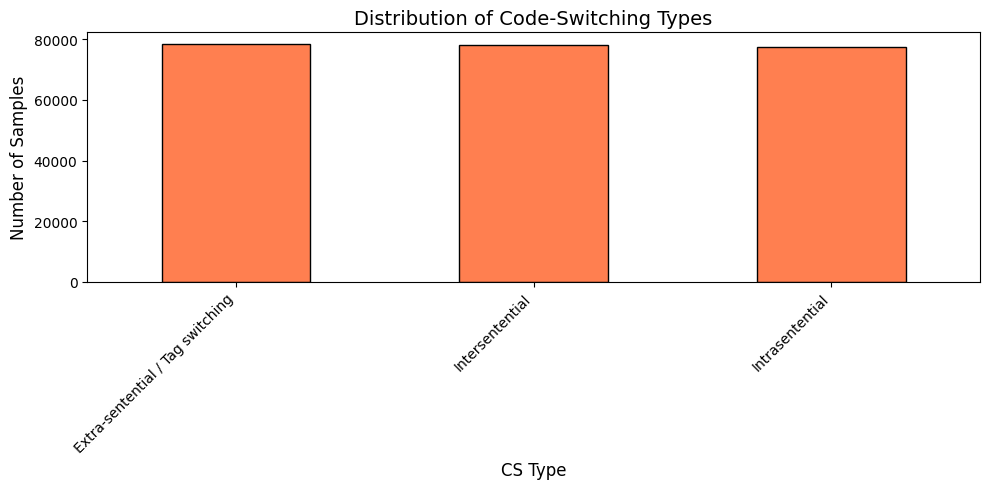


Chart saved as 'cs_type_distribution.png'


In [ ]:
# Code-Switching Type Distribution
print("=" * 60)
print("Code-Switching Type Distribution")
print("=" * 60)

cs_type_counts = df['cs_type'].value_counts()
print(cs_type_counts)

# Visualization
plt.figure(figsize=(10, 5))
cs_type_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution of Code-Switching Types', fontsize=14)
plt.xlabel('CS Type', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('cs_type_distribution.png', dpi=150)
plt.show()

print("\nChart saved as 'cs_type_distribution.png'")

Quality Score Statistics
count    234172.000000
mean          8.424857
std           0.337518
min           5.000000
25%           8.250000
50%           8.475000
75%           8.675000
max           9.750000
Name: score, dtype: float64


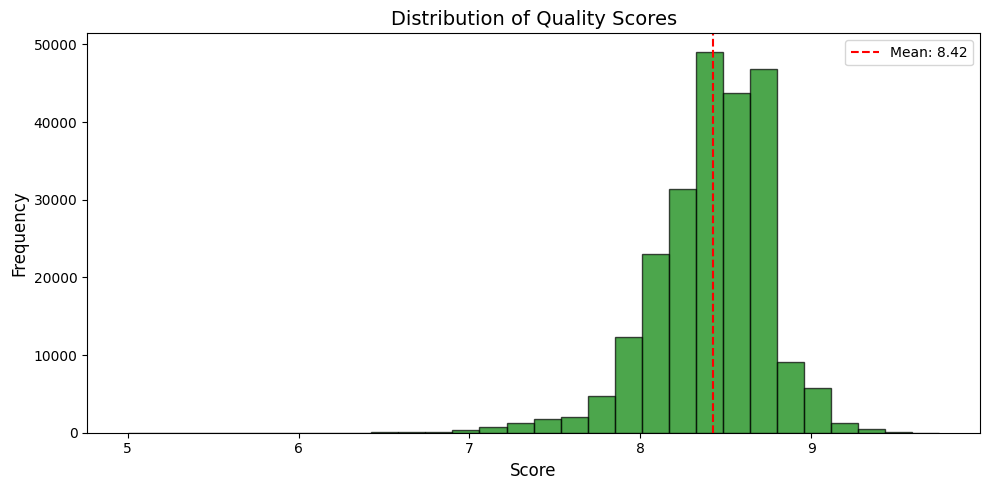


Chart saved as 'score_distribution.png'


In [ ]:
# Quality Score Distribution
print("=" * 60)
print("Quality Score Statistics")
print("=" * 60)

print(df['score'].describe())

# Visualization
plt.figure(figsize=(10, 5))
plt.hist(df['score'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Quality Scores', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['score'].mean(), color='red', linestyle='--', label=f'Mean: {df["score"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('score_distribution.png', dpi=150)
plt.show()

print("\nChart saved as 'score_distribution.png'")

Code-Switching Ratio Distribution
cs_ratio
30%    78375
50%    78052
70%    77745
Name: count, dtype: int64


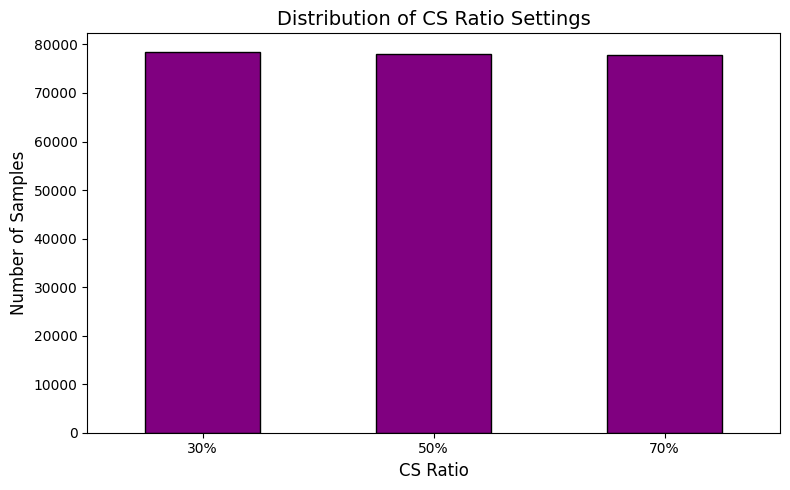


Chart saved as 'cs_ratio_distribution.png'


In [ ]:
# CS Ratio Distribution
print("=" * 60)
print("Code-Switching Ratio Distribution")
print("=" * 60)

cs_ratio_counts = df['cs_ratio'].value_counts()
print(cs_ratio_counts)

# Visualization
plt.figure(figsize=(8, 5))
cs_ratio_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Distribution of CS Ratio Settings', fontsize=14)
plt.xlabel('CS Ratio', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('cs_ratio_distribution.png', dpi=150)
plt.show()

print("\nChart saved as 'cs_ratio_distribution.png'")

In [ ]:
# Code-Switching Text Samples
print("=" * 60)
print("Code-Switching Text Samples")
print("=" * 60)

# Select samples from different language pairs
import random
random.seed(42)

sample_pairs = df['language_pair'].unique()[:3]

for pair in sample_pairs:
    sample = df[df['language_pair'] == pair].iloc[0]
    print(f"\n[Language Pair: {pair}]")
    print(f"CS Type: {sample['cs_type']}")
    print(f"Text Content:")
    print(sample['data_generation_result'][:500])  # Show first 500 characters only
    print("-" * 50)

Code-Switching Text Samples

[Language Pair: Arabic - English]
CS Type: Extra-sentential / Tag switching
Text Content:
['أنا تابعت خبر ترامب عن الفيزا للعمال المهرة، honestly الموضوع معقد شوي.', 'أشوف ناس كثير عندهم آراء مختلفة، you know?', 'على العموم، كل واحد يشوف الموضوع من زاويته، right?', 'الحياة تغيرت كثير في السنوات الأخيرة، believe me.']
--------------------------------------------------

[Language Pair: Cantonese - English]
CS Type: Intersentential
Text Content:
['根據健康醫療網，隨著肥胖問題增加，醫療界提供多種方案。The Endoscopic Sleeve Gastroplasty, 或者簡稱ESG，已經成為一種熱門的減重選擇。', "雖然有關ESG手術後的癌症風險有一些擔憂，但研究顯示，手術本身並沒有直接增加風險。It's a promising option for many patients.", "吳醫師表示，肥胖與多種癌症之間有關聯。因此，減重可以減少風險。It's crucial to address obesity to improve overall health."]
--------------------------------------------------

[Language Pair: Chinese - English]
CS Type: Intrasentential
Text Content:
["昨天我去參觀了中關村論壇的年會，看到好多機器人在現場幫忙泡茶、帶路，感覺真的像走進了未來的世界。It was so cool to watch a robot write calligraphy and even make coffee for the

In [ ]:
# Verify how score is calculated
sample = df.iloc[0]

print("=== Score Verification ===")
print(f"fluency_result: {sample['fluency_result'][:100]}...")
print(f"naturalness_result: {sample['naturalness_result'][:100]}...")
print(f"Final score: {sample['score']}")

=== Score Verification ===
fluency_result: {'fluency_score': 8, 'errors': [{'description': "Switching occurs at clause boundaries or after comp...
naturalness_result: {'naturalness_score': 9, 'observations': {'sentence_1': "Switching to 'honestly' is natural and comm...
Final score: 8.7
